In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
Gsales=pd.read_csv('Grocery.csv')

In [235]:
Gsales

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11/8/2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11/8/2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,6/12/2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10/11/2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10/11/2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,7/12/2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,6/6/2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [236]:
Gsales['Order Date']=pd.to_datetime(Gsales['Order Date'])

In [237]:
Gsales.isna().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [238]:
Gsales.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [239]:
Gsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     9994 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 859.0+ KB


In [240]:
Gsales.groupby('Category')['Profit'].sum()

Category
Bakery               528521.06
Beverages            525605.76
Eggs, Meat & Fish    567357.22
Food Grains          529162.64
Fruits & Veggies     530400.38
Oil & Masala         497895.29
Snacks               568178.85
Name: Profit, dtype: float64

In [241]:
A=Gsales.groupby('Category')['Profit'].sum()

In [242]:
n=A.index
b=A.values

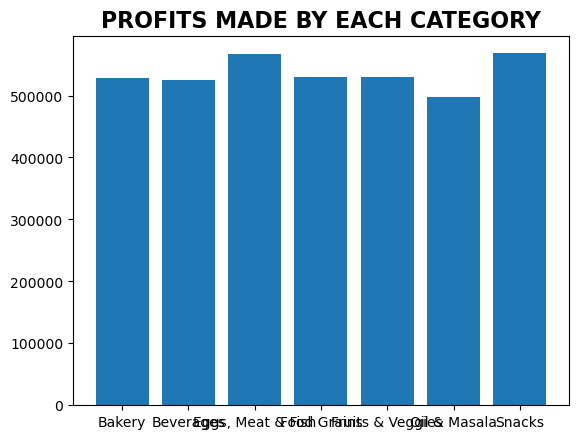

In [243]:
plt.bar(n,b)
plt.title('PROFITS MADE BY EACH CATEGORY',fontsize=16,fontweight='bold')
plt.show()

In [244]:
Regional_sales=Gsales.groupby('Region')['Sales'].sum()

In [245]:
A=Regional_sales.index
B=Regional_sales.values

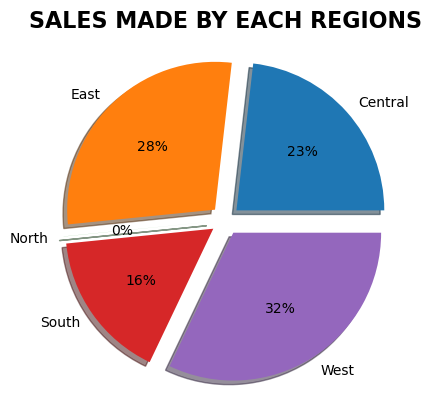

In [246]:
plt.pie(B,labels=A,autopct='%1.0f%%',shadow=True,explode=[0.1,0.1,0.1,0.1,0.1])
plt.title('SALES MADE BY EACH REGIONS',fontsize=16,fontweight='bold')
plt.show()

In [247]:
Gsales['day name']=Gsales['Order Date'].dt.day_name()

In [248]:
Daily_Sales=Gsales.groupby('day name')['Sales'].sum()

In [249]:
A=Daily_Sales.index
B=Daily_Sales.values

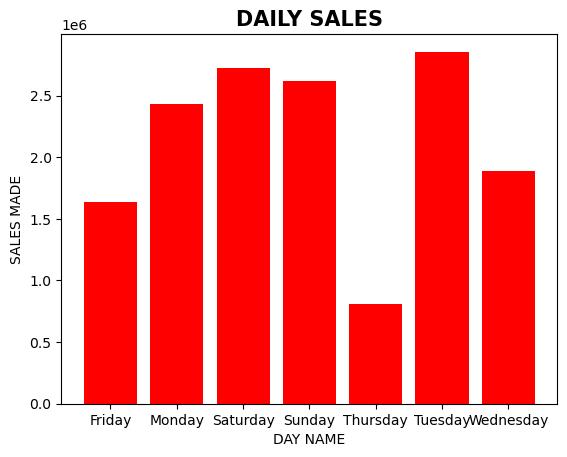

In [250]:
plt.bar(A,B,color='r')
plt.title('DAILY SALES',fontsize=15,fontweight='bold')
plt.xlabel('DAY NAME')
plt.ylabel('SALES MADE')
plt.show()

In [251]:
Top5cities=Gsales.sort_values('Sales',ascending=False).head(5)

In [252]:
Top5cities

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,day name
9851,OD9852,Sundar,Beverages,Health Drinks,Cumbum,2018-10-12,Central,2500,0.25,325.0,Tamil Nadu,Friday
8249,OD8250,Komal,Bakery,Cakes,Trichy,2016-07-31,South,2500,0.13,225.0,Tamil Nadu,Sunday
1412,OD1413,Peer,Fruits & Veggies,Organic Vegetables,Kanyakumari,2015-12-12,West,2500,0.14,1025.0,Tamil Nadu,Saturday
9972,OD9973,Vinne,Snacks,Chocolates,Perambalur,2018-02-20,West,2500,0.19,325.0,Tamil Nadu,Tuesday
2443,OD2444,Ravi,Snacks,Chocolates,Dindigul,2018-10-30,Central,2500,0.33,300.0,Tamil Nadu,Tuesday


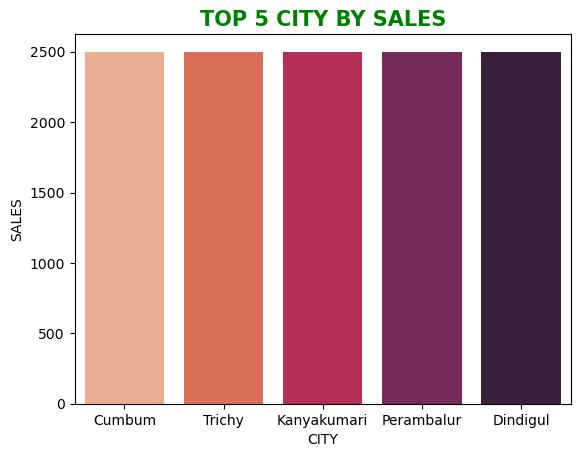

In [253]:
sns.barplot(x=Top5cities['City'],y=Top5cities['Sales'],data=Top5cities,palette='rocket_r')
plt.title('TOP 5 CITY BY SALES',fontsize=15,fontweight='bold',c='g')
plt.xlabel('CITY')
plt.ylabel('SALES')
plt.show()

In [254]:
Gsales['Year']=Gsales['Order Date'].dt.year

In [255]:
Gsales

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,day name,Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,Wednesday,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,Wednesday,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,Monday,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,Tuesday,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,Tuesday,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10,Tamil Nadu,Thursday,2015
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70,Tamil Nadu,Sunday,2015
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,Tamil Nadu,Tuesday,2017
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24,Tamil Nadu,Tuesday,2018


In [256]:
Yearly_Profits=Gsales.groupby('Year')['Profit'].sum()

In [257]:
Yearly_Profits

Year
2015     752529.11
2016     797192.99
2017     953216.22
2018    1244182.88
Name: Profit, dtype: float64

In [258]:
A=Yearly_Profits.index
B=Yearly_Profits.values

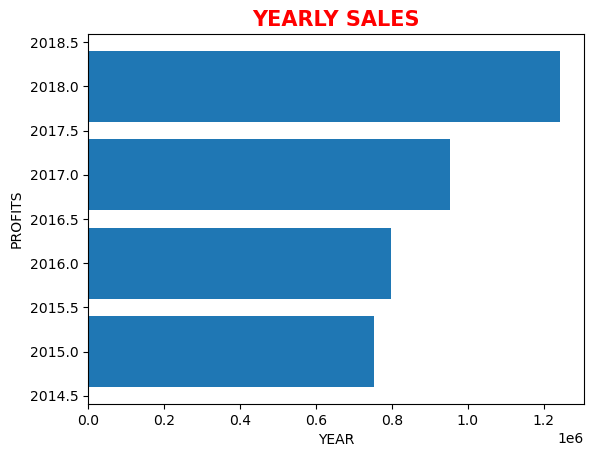

In [260]:
plt.barh(A,B)
plt.title('YEARLY SALES',fontsize=15,fontweight='bold',color='r')
plt.xlabel('YEAR')
plt.ylabel('PROFITS')
plt.show()

In [261]:
Gsales.City

0           Vellore
1       Krishnagiri
2        Perambalur
3        Dharmapuri
4              Ooty
           ...     
9989        Madurai
9990    Kanyakumari
9991           Bodi
9992     Pudukottai
9993    Tirunelveli
Name: City, Length: 9994, dtype: object

In [262]:
Gsales['Sub Category'].nunique()

23

In [263]:
TopSubCat=Gsales.sort_values('Profit',ascending=False).head(10)

In [265]:
prosub=TopSubCat.groupby('Sub Category')['Profit'].sum()

In [266]:
e=prosub.index
f=prosub.values

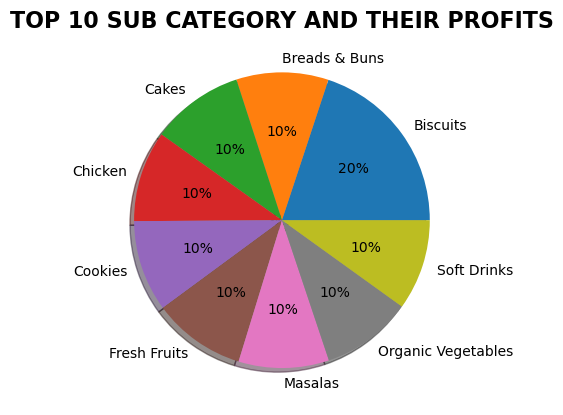

In [267]:
plt.pie(f,labels=e,autopct='%1.0f%%',shadow=True)
plt.title('TOP 10 SUB CATEGORY AND THEIR PROFITS',fontsize=16,fontweight='bold')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_12160\1095516846.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


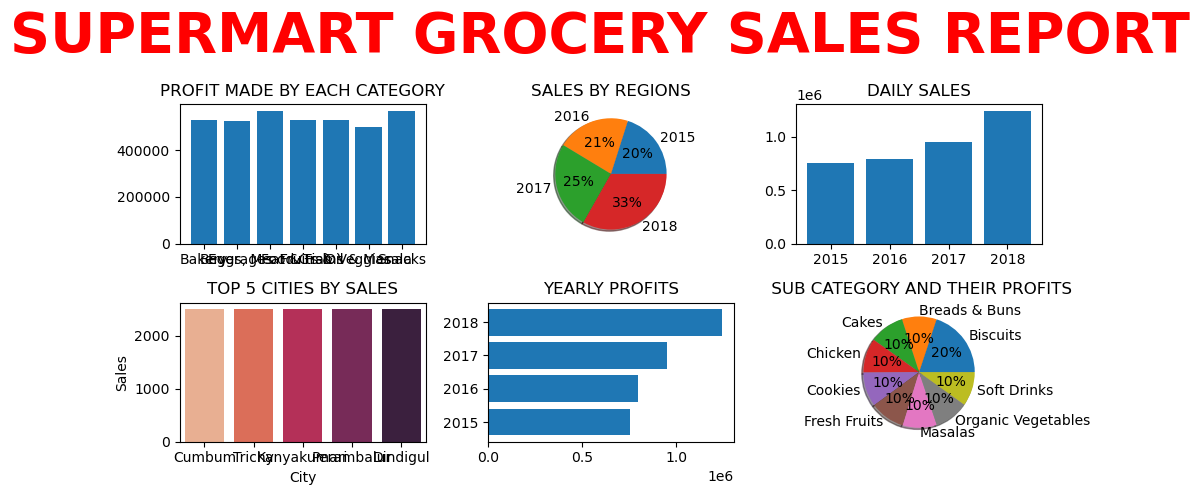

In [272]:
fig,Gsales=plt.subplots(nrows=2,ncols=3,figsize=(10,5))
fig.suptitle('SUPERMART GROCERY SALES REPORT',fontsize=40,fontweight='bold',c='r')
plt.tight_layout()
Gsales[0,0].set(title='PROFIT MADE BY EACH CATEGORY')
Gsales[0,0].bar(n,b)
Gsales[0,1].set(title='SALES BY REGIONS')
Gsales[0,1].pie(B,labels=A,autopct="%1.0f%%",shadow=True)
Gsales[0,2].set(title='DAILY SALES')
Gsales[0,2].bar(A,B)
Gsales[1,0].set(title='TOP 5 CITIES BY SALES')
sns.barplot(x=Top5cities['City'],y=Top5cities['Sales'],data=Top5cities,palette='rocket_r',ax=Gsales[1,0])
Gsales[1,1].barh(A,B)
Gsales[1,1].set(title='YEARLY PROFITS')
Gsales[1,2].set(title=' SUB CATEGORY AND THEIR PROFITS')
Gsales[1,2].pie(f,labels=e,autopct="%1.0f%%",shadow=True)
plt.tight_layout()
plt.savefig('SUPERMART GROCERY SALES REPORT')
plt.show()